[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ClimateMatchAcademy/course-content/blob/main/tutorials/W2D4_ClimateResponse-Extremes&Variability/W2D4_Tutorial1.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/{ORG}/course-content/main/tutorials/W2D4_ClimateResponse-Extremes&Variability/W2D4_Tutorial1.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# **Tutorial 1: Distributions**

**Week 2, Day 4, Extremes & Vulnerability**

**Content creators:** Matthias Aengenheyster, Joeri Reinders

**Content reviewers:** Younkap Nina Duplex, Sloane Garelick, Zahra Khodakaramimaghsoud, Peter Ohue, Laura Paccini, Jenna Pearson, Agustina Pesce, Derick Temfack, Peizhen Yang, Cheng Zhang, Chi Zhang, Ohad Zivan

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS

# **Tutorial Objectives**

In this initial tutorial, your focus will be on examining the distribution of annual extreme precipitation levels in Germany. Your objective is to explore various aspects of the distribution, including the mean, variance, and skewness. By the end of this tutorial, you will be able to:

- Visualize an observational record as both a timeseries and a distribution.
- Compute the *moments* of a record.
- Generate and plot a distribution with predefined *moments*.

# **Setup**

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pooch
from scipy import stats

In [ ]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

In [ ]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

# **Section 1: Inspect a Precipitation Record and Plot it Over Time**

Extreme rainfall can pose flood hazards with disasterous consequences for society, the economy, and ecosystems. Annual maximum daily precipitation is a valuable measurement for assessing flood risks, and in this tutorial you will start the journey of statistically analyzing a dataset of annual maximum daily precipitation records for Germany. 

First, download the precipitation files:

In [ ]:
# download file: 'precipitationGermany_1920-2022.csv'
url_precipitationGermany = "https://osf.io/xs7h6/download"


data = pd.read_csv(pooch.retrieve(url_precipitationGermany, known_hash=None),
                   index_col=0).set_index('years')
data.columns=['precipitation']
precipitation = data.precipitation

In [ ]:
precipitation

years
1920    24.5
1921    27.7
1922    15.6
1923    23.5
1924    59.9
        ... 
2018    31.6
2019    24.9
2020    33.3
2021    57.4
2022    25.4
Name: precipitation, Length: 103, dtype: float64

You can see that for each year between 1920 and 2022, there is one number. This represents the largest amount of precipitation that was observed at a point in Germany at 51 N 6 E. In other words, for each year one looked at each day's precipitation and included the highest amount in this timeseries. 

Now we can plot a time series of the data from 1920-2022.

Text(0, 0.5, 'Annual Maximum Daily Precipitation \n(mm/day)')

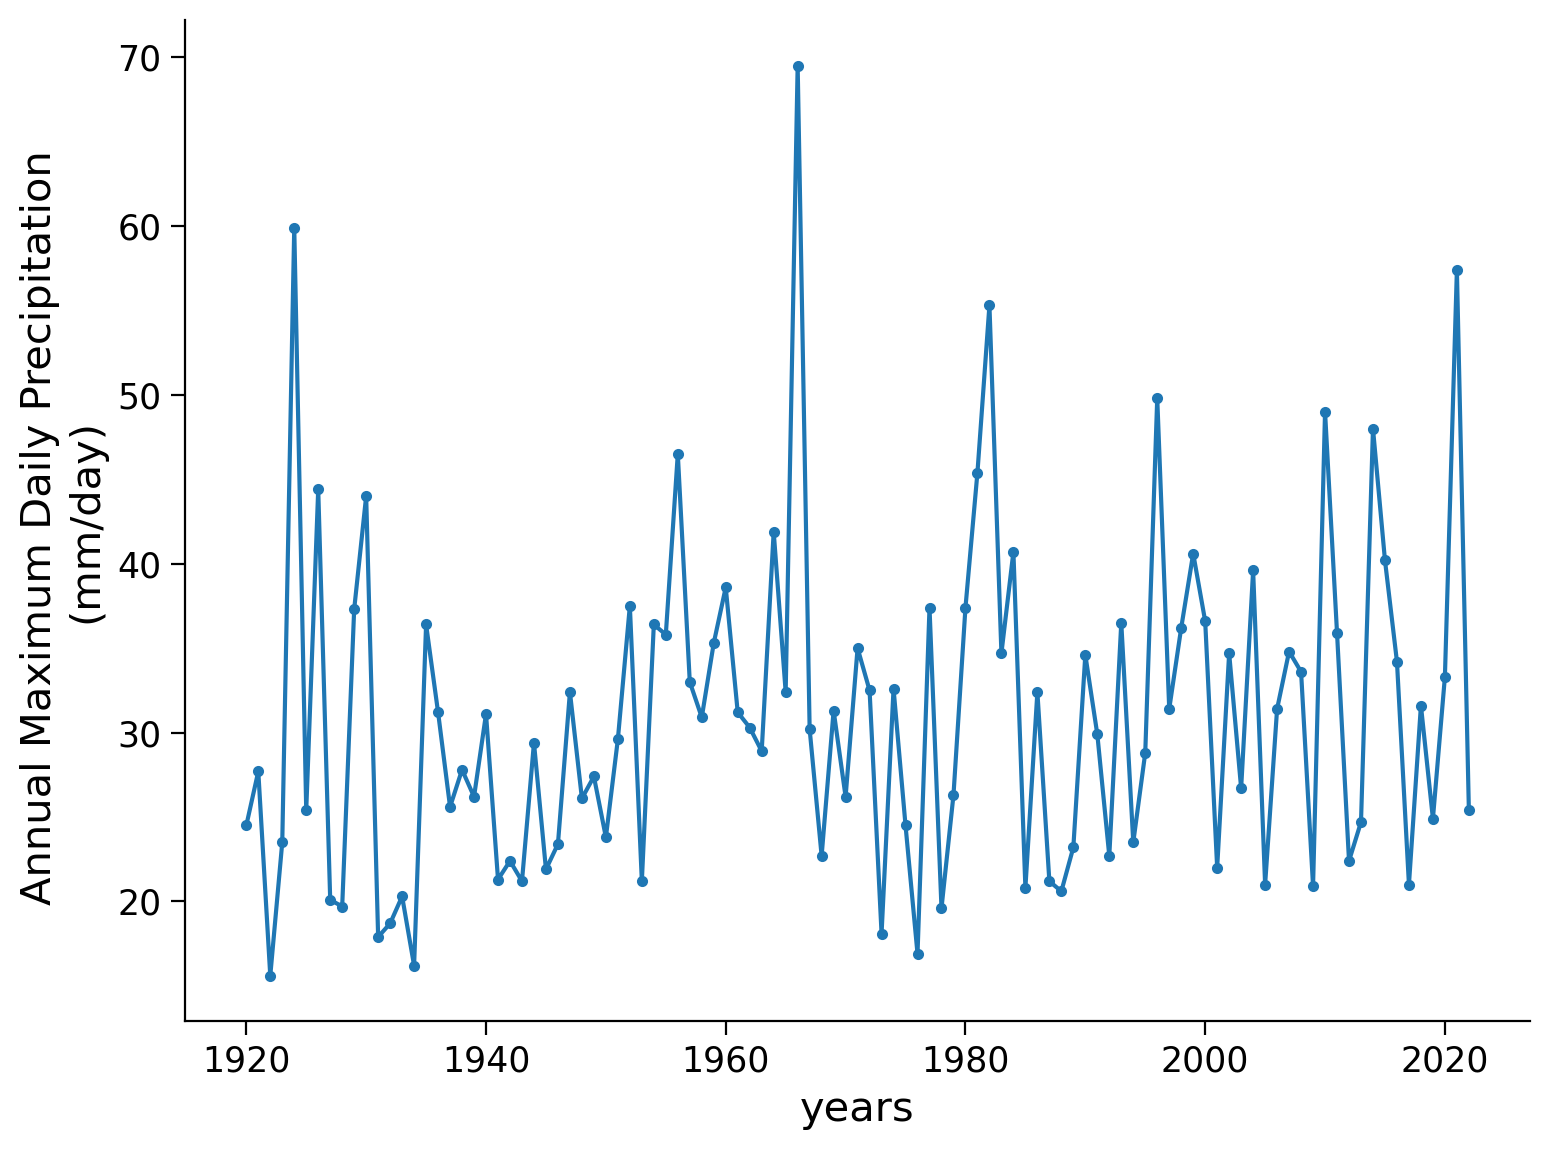

In [ ]:
precipitation.plot.line(style='.-')
plt.ylabel('Annual Maximum Daily Precipitation \n(mm/day)')

To make this dataset more interpretable, we can plot a histogram of the data. Recall that we can make a histogram of this data by plotting the y-axis from the previous figure on the x-axis of this new figure versus the count of how many data points fall within a 'bin' on the x-axis. 

Text(0.5, 0, 'Annual Maximum Daily Precipitation \n(mm/day)')

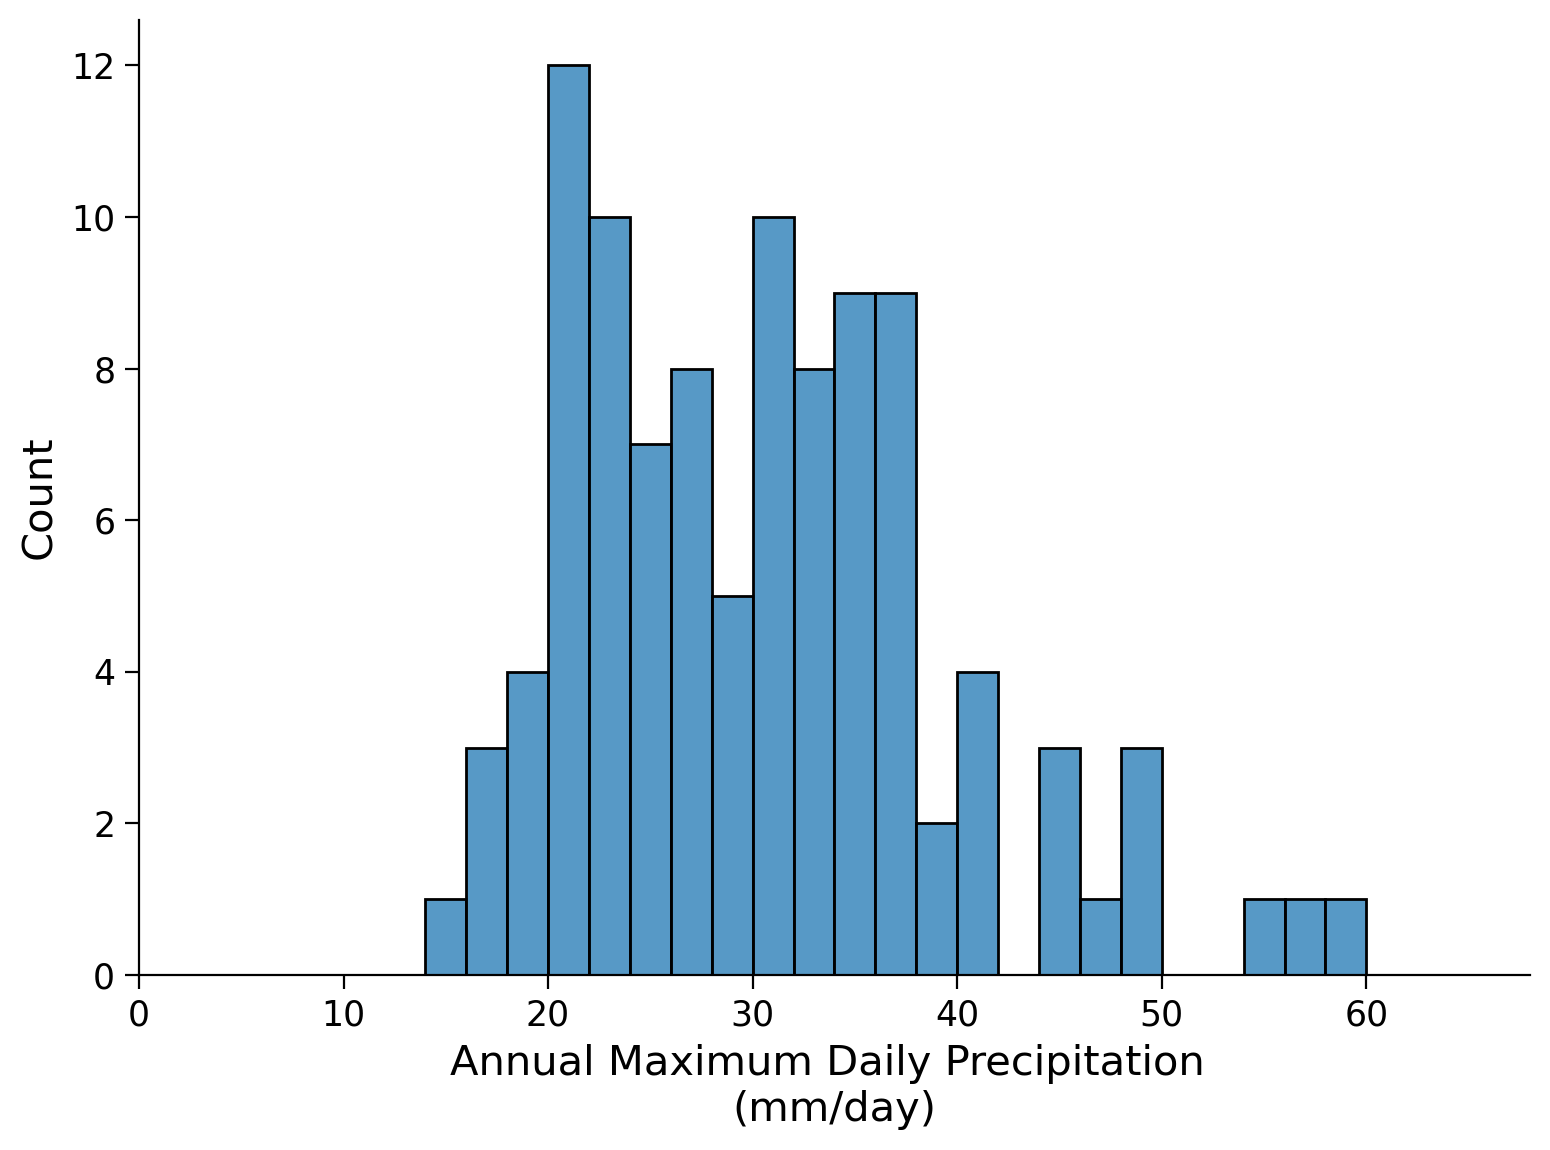

In [ ]:
# create the bins (x axis) for the data
fig,ax=plt.subplots()
bins=np.arange(0,precipitation.max(),2)

# make the histogram
sns.histplot(precipitation,bins=bins,ax=ax)

# set limits and labels
ax.set_xlim(bins[0],bins[-1])
ax.set_xlabel('Annual Maximum Daily Precipitation \n(mm/day)')

Next let's calculate the moments of our dataset. A [moment](https://glossary.ametsoc.org/wiki/Moment) helps us define the center of mass ([mean](https://glossary.ametsoc.org/wiki/Expected_value)), scale ([variance](https://glossary.ametsoc.org/wiki/Variance)), and shape ([skewness](https://glossary.ametsoc.org/wiki/Skewness) and [kurtosis](https://glossary.ametsoc.org/wiki/Kurtosis)) of a distribution. The scale is how the data is stretched or compressed along the x-axis, while the shape parameters help us answer questions about the geometry of the distribution, for example if data points lie more frequently to one side of the mean than the other or if the tails are 'heavy' (i.e. larger chance of getting extreme values).

Let's compute the mean, the variance and the [standard deviation](https://glossary.ametsoc.org/wiki/Standard_deviation) of your precipitation data. Plot the mean as a vertical line on the histogram.

In [ ]:
# mean
mean_pr = precipitation.mean()

# variance
var_pr = precipitation.var()

# standard deviation
std_pr = precipitation.std()

In [ ]:
mean_pr, var_pr, std_pr

(30.97184466019418, 98.55047401484866, 9.927259139100212)

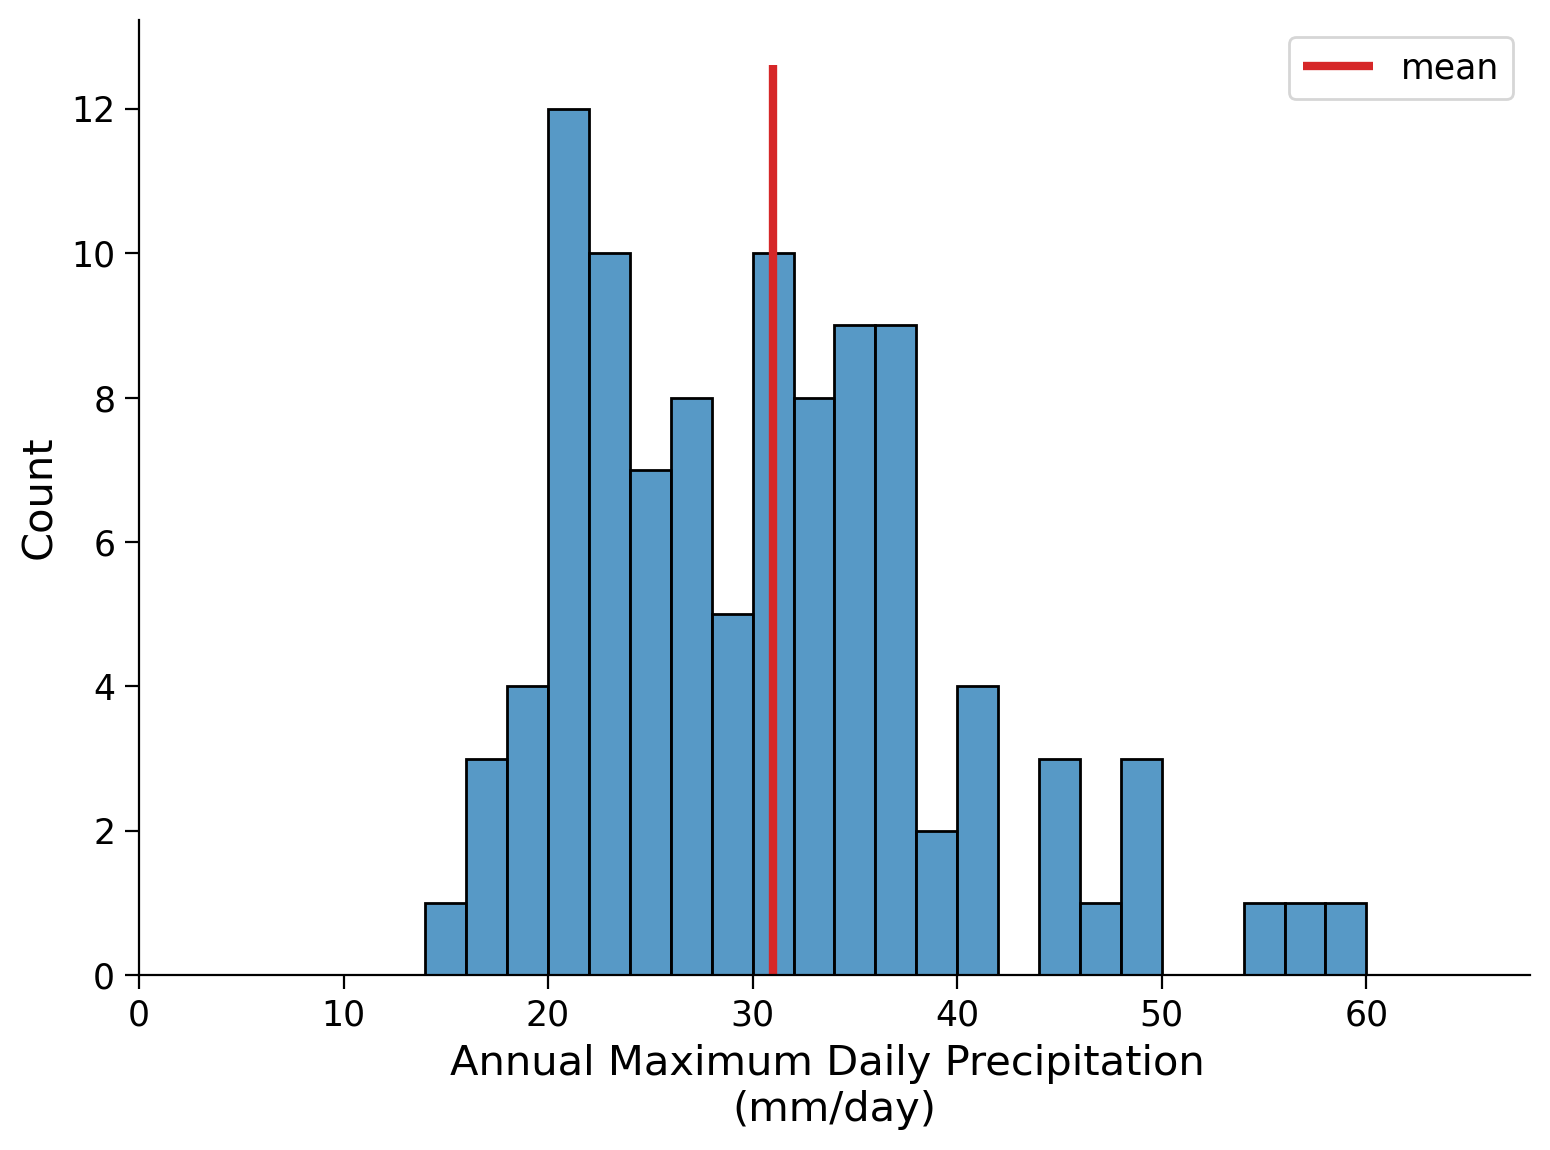

In [ ]:
# re-plot histogram from above
fig,ax=plt.subplots()
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins,ax=ax) # this will plot the counts for each bin
ax.set_xlim(bins[0],bins[-1])

ylim = ax.get_ylim()

# add in vertical line at mean
ax.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3,label='mean')
ax.set_xlabel('Annual Maximum Daily Precipitation \n(mm/day)')
ax.legend()

As you can observe, the range of values on either side of the mean-line you added earlier is unequal, suggesting a skewed distribution. To assess the extent of the potential [skewness](https://glossary.ametsoc.org/wiki/Skewness), we will use the [`.skew()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html#pandas-dataframe-skew) function. We will also generate a set of 100 random values from a normal distribution (mean = 0, standard deviation = 1) and compare its skewness to that of the precipitation data.

In [ ]:
# calculate the skewness of our precip data
precipitation.skew()

1.1484425874858337

In [ ]:
# generate data following a normal distribution (mean = 0, standard deviation = 1)
normal_data = np.random.normal(0,1,size=data.index.size)

In [ ]:
# calculate the skewness of a normal distribution
stats.skew(normal_data)

-0.2344344792388207

Note that a more positive value of skewness means the tail on the right is longer/heavier and extends more towards the positive values, and vice versa for a more negative skewness. An unskewed dataset would have a value of zero - such as the normal distribution.

By comparing the precipitation data to the skewness of the normal distribution, we can see that our data is positively skewed, meaning that the right tail of the distribution contains more data than the left. This is in keeping with our finding from the histogram.

To delve deeper into this observation, let's try fitting a normal distribution to our precipitation data. This entails computing the mean and standard deviation of the 'precipitation' variable, which serve as the two parameters for a normal distribution. 

By utilizing the `scipy` function `norm.pdf`, we can generate a probability density function (pdf) that accompanies our histogram. The pdf provides insight into the probability of encountering various levels of precipitation based on the available data. For a normal distribution the mean value exhibits the highest probability (this is not the case for all distributions!).

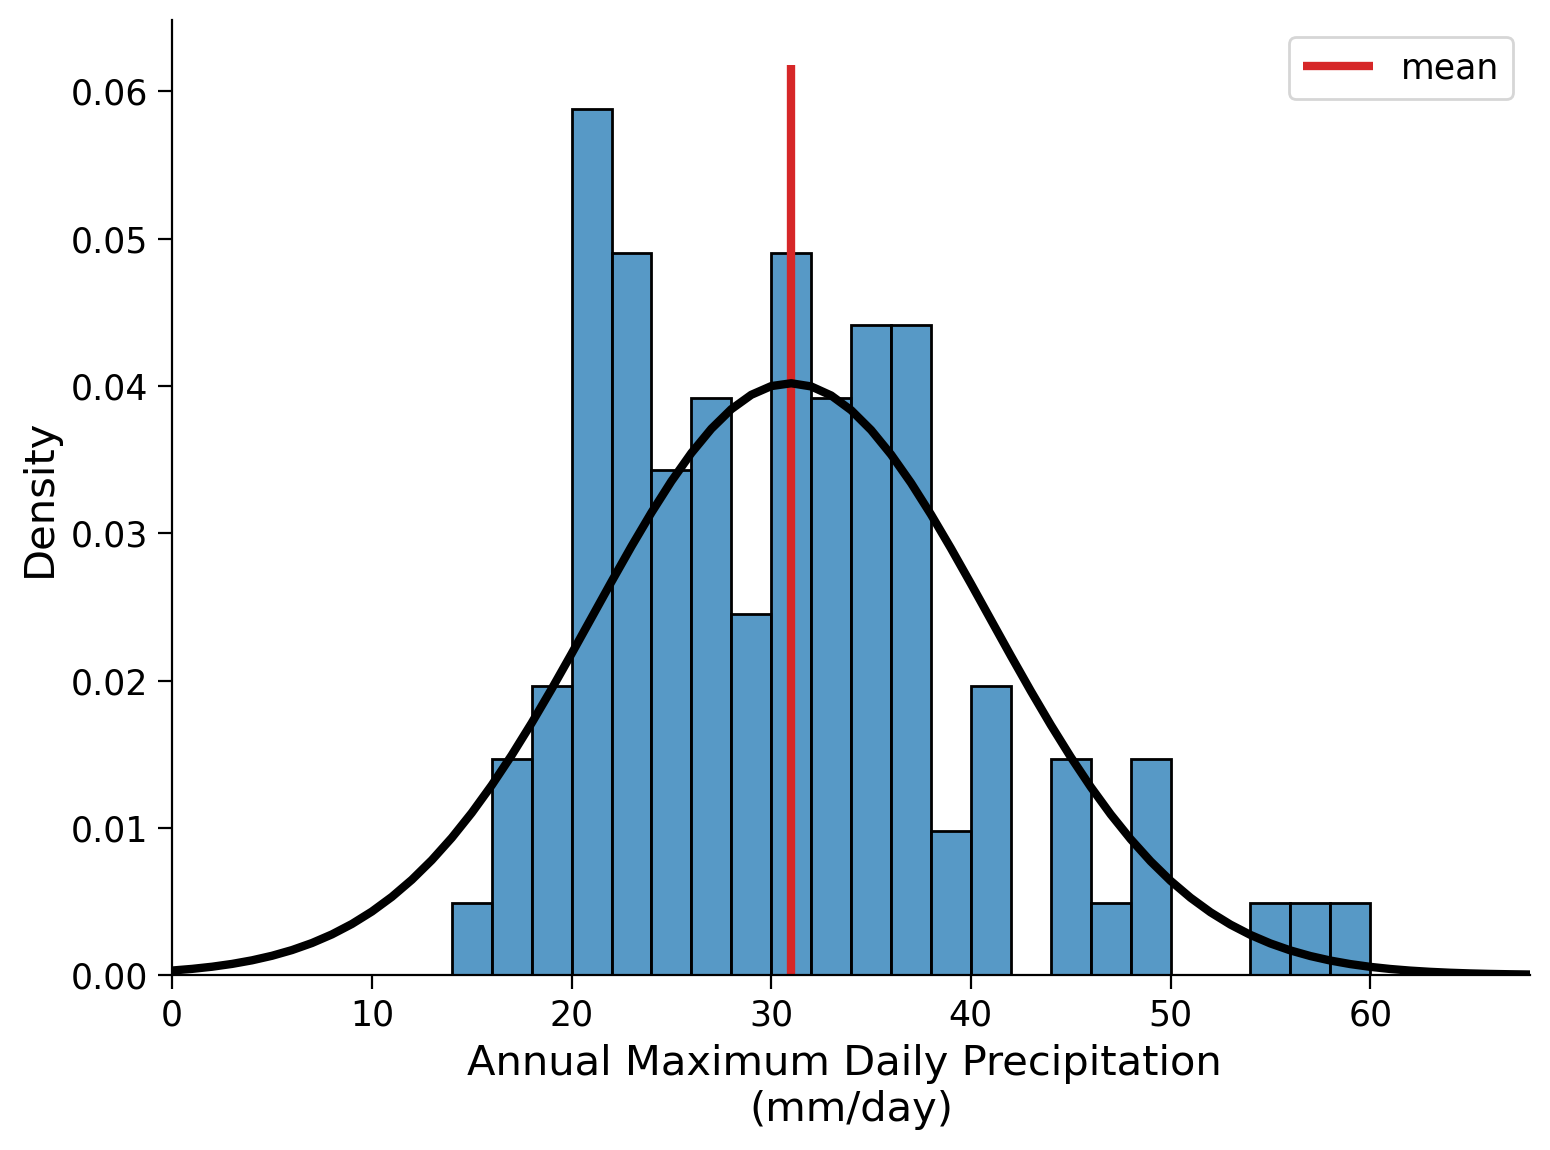

In [ ]:
fig,ax=plt.subplots()
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins,ax=ax,stat='density') # notice the different stat being ploted
ax.set_xlim(bins[0],bins[-1])

ylim = ax.get_ylim()

# add in vertical line at mean
ax.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3,label='mean')

# add PDF
x_r100 = np.arange(0,100,1)
ax.plot(x_r100,stats.norm.pdf(x_r100,mean_pr,std_pr),c='k',lw=3)

ax.set_xlabel('Annual Maximum Daily Precipitation \n(mm/day)')
ax.legend()

## Coding Exercises 1

Add uncertainty bands to the distribution.

1. Create 1000 records of 100 samples each that are drawn from a normal distribution with the mean and standard deviation of the precipitation record.
2. Compute the 5-th and 95-th percentiles across the 1000-member ensemble and add them to the figure above to get an idea of the uncertainty.

Hint: you can use the function `np.random.normal` to draw from a normal distribution. Call `np.random.normal` or `help(np.random.normal)` to understand how to use it. `np.quantile` is useful for computing quantiles. 

In [ ]:
# take 1000 records of 100 samples
random_samples = ...

# create placeholder for pdfs
pdfs = np.zeros([x_r100.size,1000])

# loop through all 1000 records and create a pdf of each sample
for i in range(1000):
    # find pdfs
    pdfi = ...

    # add to array
    ...

In [ ]:
# to_remove solution

# take 1000 records of 100 samples
random_samples = np.random.normal(mean_pr,std_pr,size=[100,1000])

# create placeholder for pdfs
pdfs = np.zeros([x_r100.size,1000])

# loop through all 1000 records and create a pdf of each sample
for i in range(1000):
    # find pdfs
    pdfi = stats.norm.pdf(x_r100,random_samples[:,i].mean(),random_samples[:,i].std())

    # add to array
    pdfs[:,i] = pdfi

Text(0.5, 0, 'Annual Maximum Daily Precipitation \n(mm/day)')

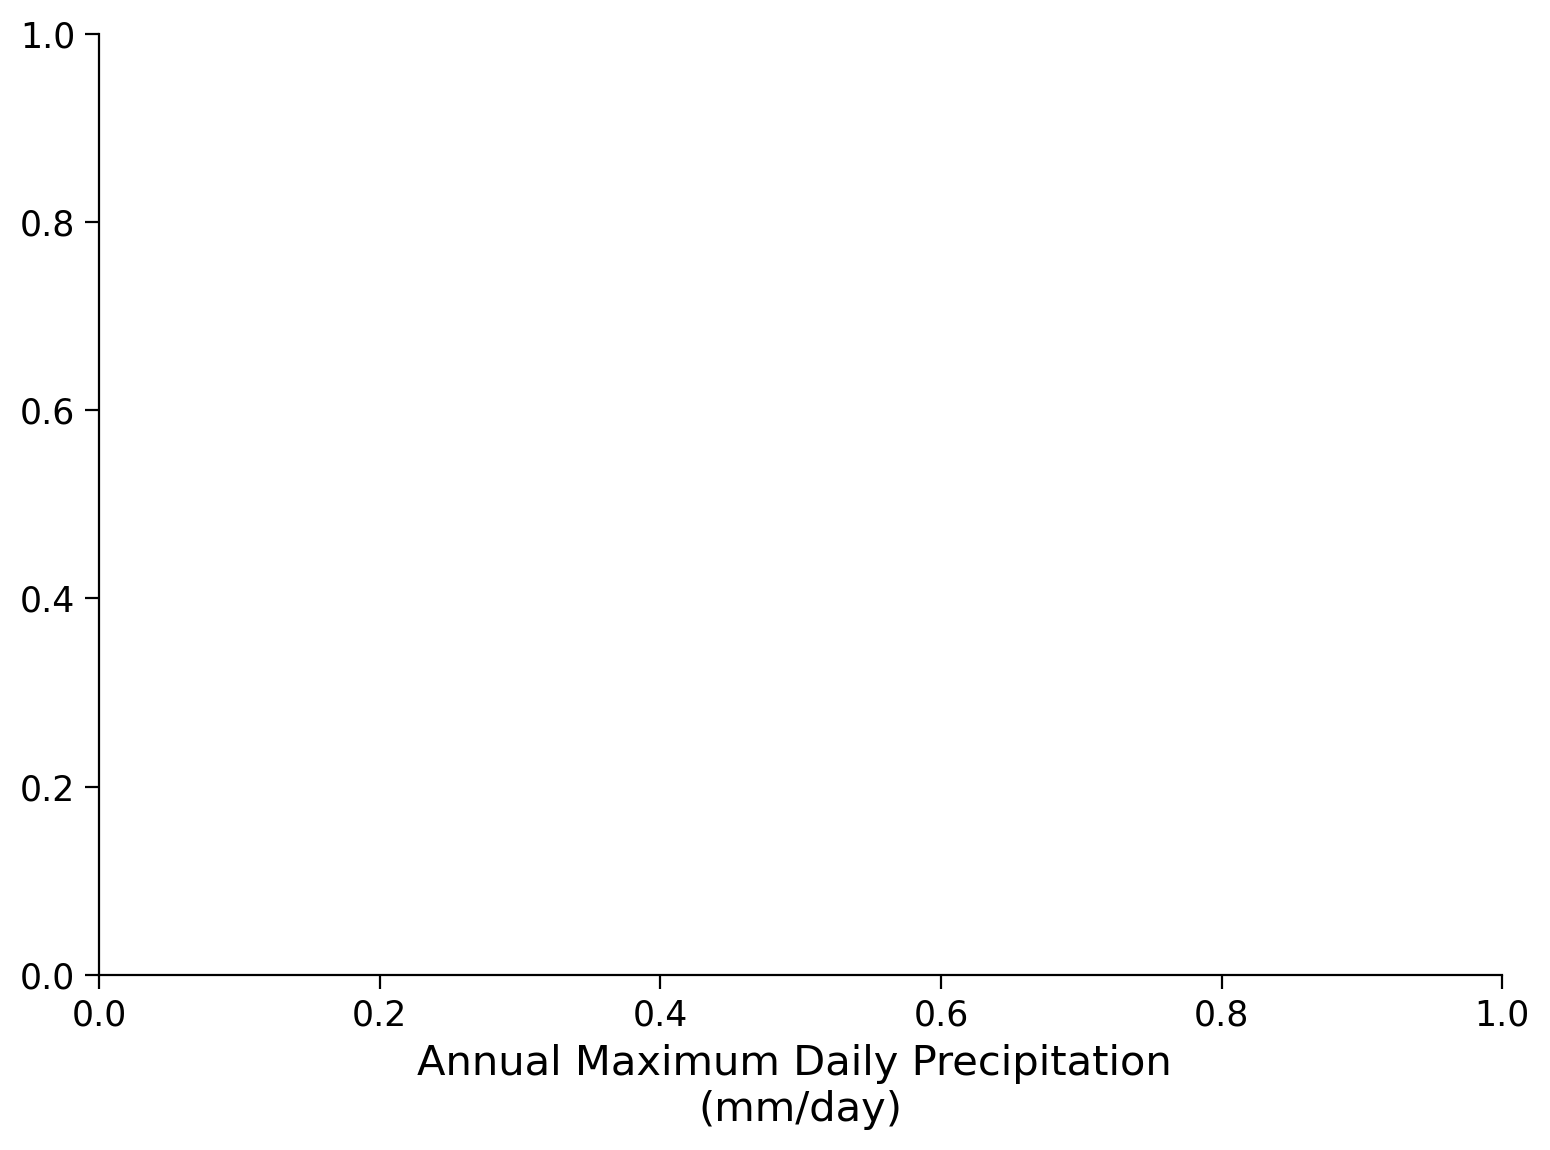

In [ ]:
fig,ax=plt.subplots()

# make histogram
_ = ...

# set x limits
_ = ...

# get y lims for plotting mean line
ylim = ...

# add vertical line with mean
_ = ...

# plot pdf
_ = ...

# plot 95th percentile
_ = ...

# plot 5th percentile
_ = ...

# set xlabel
ax.set_xlabel('Annual Maximum Daily Precipitation \n(mm/day)')

Text(0.5, 0, 'Annual Maximum Daily Precipitation \n(mm/day)')

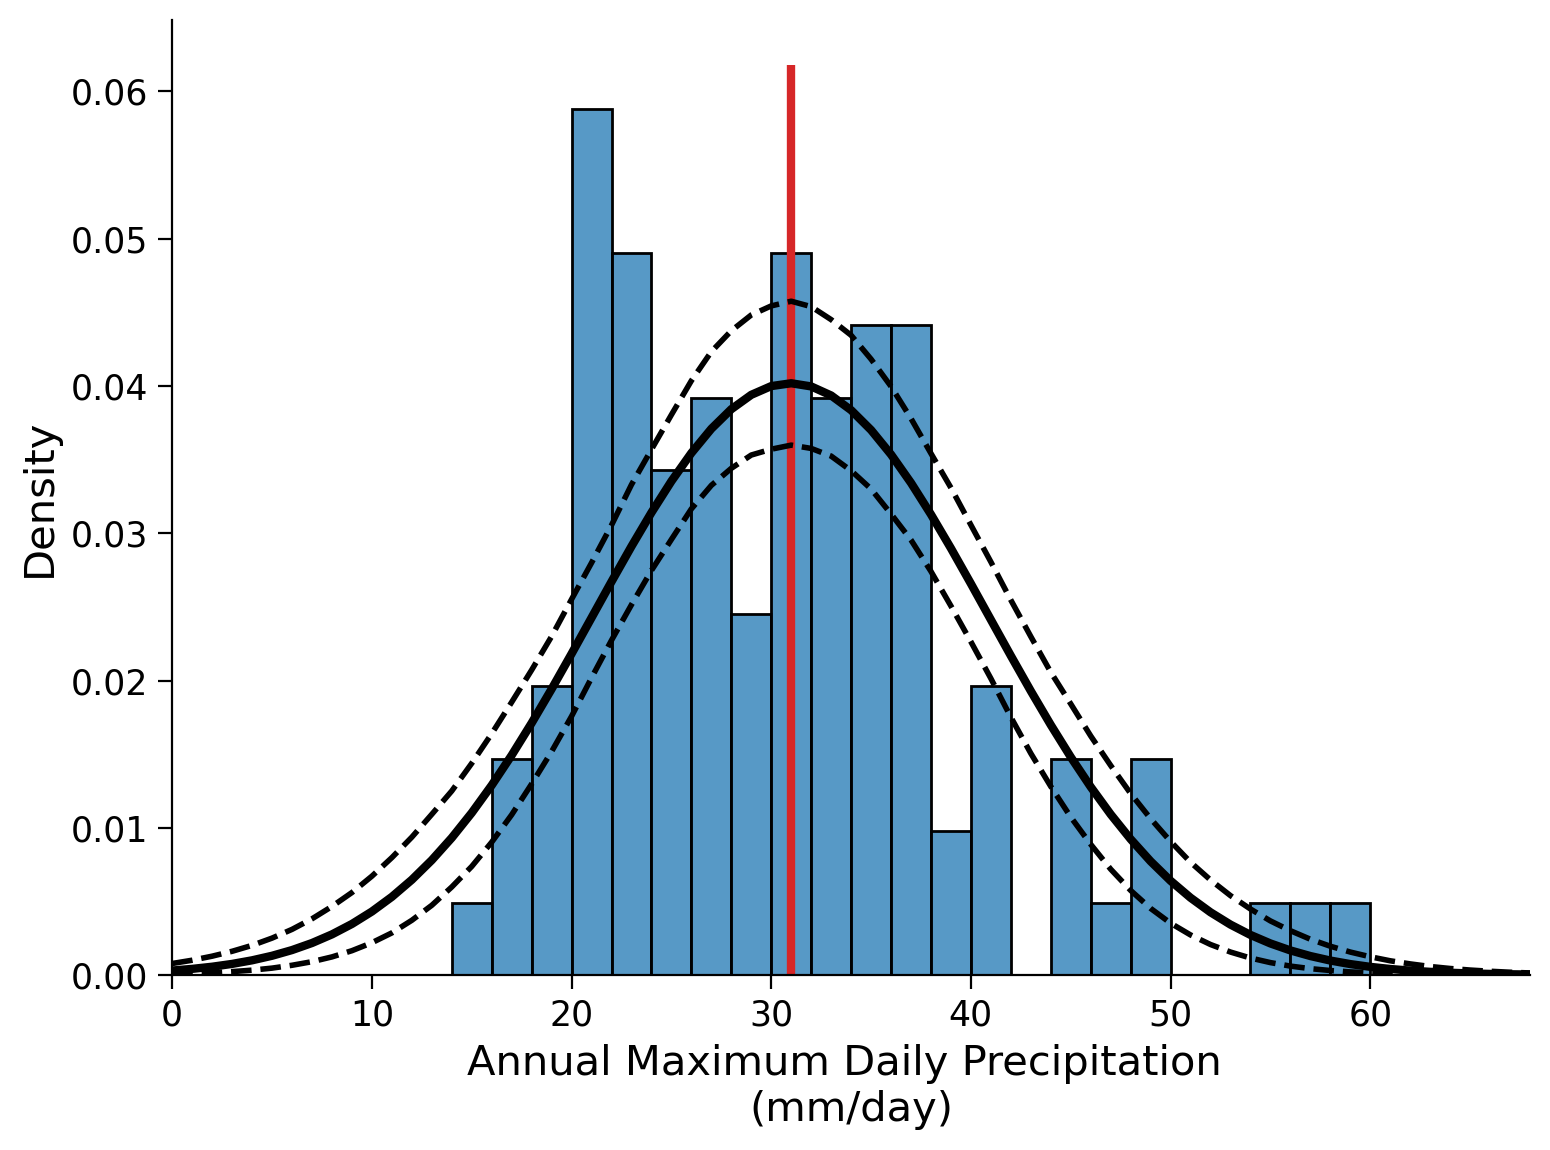

In [ ]:
# to_remove solution

fig,ax=plt.subplots()

# make histogram
_ = sns.histplot(precipitation,bins=bins,stat='density',ax=ax)

# set x limits
_ =ax.set_xlim(bins[0],bins[-1])

# get y lims for plotting mean line
ylim = ax.get_ylim()

# add vertical line with mean
_ =  ax.vlines(mean_pr, ymin=ylim[0], ymax=ylim[1], color='C3', lw=3)

# plot pdf
_ = ax.plot(x_r100,stats.norm.pdf(x_r100,mean_pr,std_pr),c='k',lw=3)

# plot 95th percentile
_ = ax.plot(x_r100, np.quantile(pdfs,0.95,axis=1),'--',lw=2,color='k')

# plot 5th percentile
_ = ax.plot(x_r100, np.quantile(pdfs,0.05,axis=1),'--',lw=2,color='k')

# set xlabel
ax.set_xlabel('Annual Maximum Daily Precipitation \n(mm/day)')

## Questions 1
1. Based on the current plot, does a normal distribution accurately describe your model? Why or why not? 

In [ ]:
# to_remove explanation
"""
1.As presented in the figure above, the data falls largely outside of the percentiles you calculated. That, paired with the skewness calculated earlier suggests a different distribution may fit the data better. For example, log-normal distributions tend to be be better suited for describing skewed datasets such as this.
""";

# **Summary**
In this tutorial, you focused on the analysis of annual maximu daily precipitation levels in Germany. You started by visualizing the observational record as both a timeseries and a distribution. This led you to compute the moments of the record, specifically, the mean, variance, and standard deviation. You then compared the skewness of the precipitation data to a normally distributed set of values. Finally you assessed the fit of a normal distribution to your dataset.

# **Resources**

Data from this tutorial uses the 0.25 degree precipitation dataset E-OBS. It combines precipitation observations to generate a gridded (i.e. no "holes") precipitation over Europe. We used the precipitation data from the gridpoint at 51 N, 6 E. 

The dataset can be accessed using the KNMI Climate Explorer [here](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=ensembles_025_rr). The Climate Explorer is a great resource to access, manipulate and visualize climate data, including observations and climate model simulations. It is freely accessible - feel free to explore!